# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url = 'https://raw.githubusercontent.com/DS3001/labs/refs/heads/main/04_hedonic_pricing/airbnb_hw.csv'
df = pd.read_csv(url)

In [2]:
#1
#data cleaning
df.drop_duplicates(inplace=True)
price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
df['Review Scores Rating'] = pd.to_numeric(df['Review Scores Rating'], errors='coerce')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 30461 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30461 non-null  int64  
 1   Host Since                  30458 non-null  object 
 2   Name                        30461 non-null  object 
 3   Neighbourhood               30461 non-null  object 
 4   Property Type               30458 non-null  object 
 5   Review Scores Rating (bin)  22152 non-null  float64
 6   Room Type                   30461 non-null  object 
 7   Zipcode                     30327 non-null  float64
 8   Beds                        30376 non-null  float64
 9   Number of Records           30461 non-null  int64  
 10  Number Of Reviews           30461 non-null  int64  
 11  Price                       30461 non-null  object 
 12  Review Scores Rating        22152 non-null  float64
dtypes: float64(4), int64(3), 

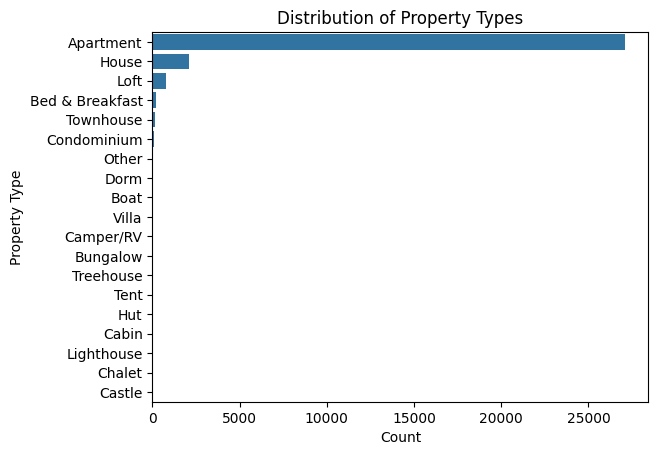

In [3]:
#eda
print("Data Info:")
df.info()

sns.countplot(y='Property Type', data=df, order=df['Property Type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

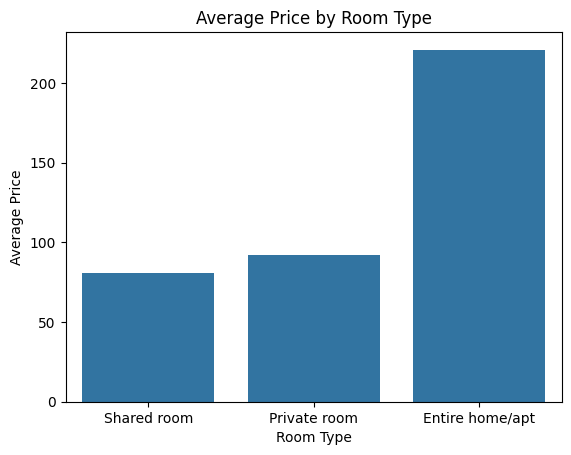

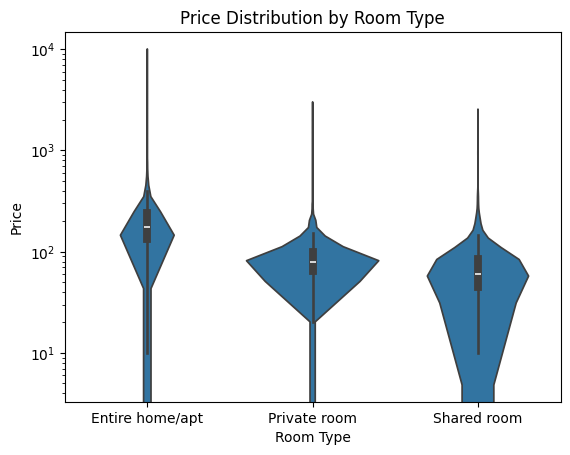

In [4]:
#visualization
df['Price'] = pd.to_numeric(df['Price'].replace('[\$,]', '', regex=True), errors='coerce')
average_price_by_room = df.groupby('Room Type')['Price'].mean().sort_values()
sns.barplot(x=average_price_by_room.index, y=average_price_by_room.values)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

sns.violinplot(x='Room Type', y='Price', data=df)
plt.yscale('log')  # Using log scale for better readability of price distribution
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [5]:
#2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
X = df[['property_type', 'room_type', 'beds', 'number_of_records', 'number_of_reviews', 'review_scores_rating']]
y = df['price']
X = pd.get_dummies(X, columns=['property_type', 'room_type'], drop_first=True)

In [6]:
#3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#4
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
#test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training RMSE: {train_rmse:.2f}, Training R^2: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, Test R^2: {test_r2:.2f}")

Training RMSE: 176.13, Training R^2: 0.17
Test RMSE: 198.33, Test R^2: 0.15


In [11]:
#5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Complex Model Training RMSE: {train_rmse:.2f}, Training R^2: {train_r2:.2f}")
print(f"Complex Model Test RMSE: {test_rmse:.2f}, Test R^2: {test_r2:.2f}")

Complex Model Training RMSE: 173.60, Training R^2: 0.19
Complex Model Test RMSE: 317.78, Test R^2: -1.19


 > The complex model does better on the training data, but it overfits and performs much worse on the test data as shown with higher errors and a negative $R^2$.




> 6. We started with a simple linear model that showed moderate performance on both training and test sets, having a basic fit. Adding complexity with polynomial and interaction terms improved the training accuracy but led to a much higher error on the test set, showing clear overfitting. This comparison emphasizes that while complex models can capture more details in training data, they risk poor generalization to new data. Overall, balancing model complexity is crucial, as an overly complex model can fit the training data too closely, failing to perform well on unseen data.